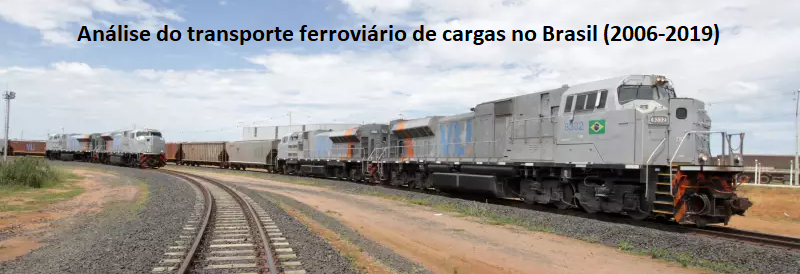

In [11]:
from IPython.core.display import Image, display
display(Image('banner-ferrovias.png', width=800))

# 1) Panaroma do modal ferroviário

## 1.2) Breve histórico das ferrovias no Brasil

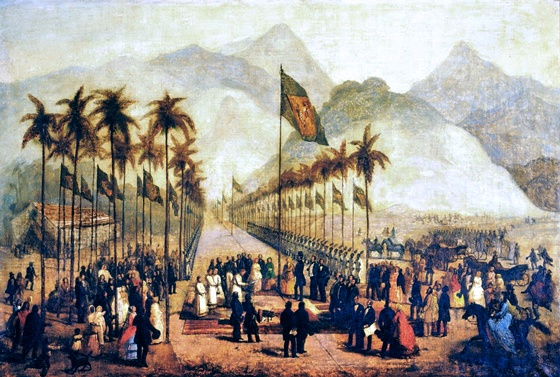

In [19]:
display(Image('Inauguração_Estrada_de_ferro_Mauá_(1854).jpg',width=500,height=350))

A primeira ferrovia do Brasil foi inaugurada em 30 de abril de 1854 pelo empresário Irineu Evangelista de Souza (Barão de Mauá) e ficou conhecida como Estrada de Ferro Mauá contando com 14,5 quilometros de extensão. A ferrovia escoava mercadorias do Porto de Mauá na Baía da Guanabara até a atual cidade de Magé no Rio de Janeiro. No restante do século novas estradas de ferro foram construídas em parte com capital estrangeiro, principalmente inglês, nos Estados de São Paulo, Pernambuco, Rio Grande do Sul e Paraná.

O período da República Velha apresentou grande expansão da malha ferroviária com a Estrada de Ferro Vitória a Minas. Já na Era Vargas, as ferrovias foram deixadas de lado para a expansão do modal rodoviário e expansão do uso do automóvel no Brasil. Em 1957, a situação financiera das ferrovias era crítica com a necessidade de socorro do Governo Federal através da criação da Rede Ferroviária Federal S/A (RFFSA) e diversas superintendências regionais para controle estatal do modal ferroviário. Além da criação da nova empresa, houve redução na malha ferroviária do Brasil visando a extinção de trechos com altos custos e pouco ganho econômico. Durante o regime militar a situação financeira da RFFSA se agravou constituindo em grande passivo para o governo federal em um momento de crise financeira nacional.

O governo Collor buscou contornar a crise financeira através de um extenso programa de privatizações no país denominado Programa Nacional de Desestatização (PND) em 1992, sendo a RFFSA um dos alvos das privatizações devido à sua péssima situação financeira. A RFFSA acabou sendo privatizada em 1996 no governo de Fernando Henrique Cardoso e foi repartida entre diversas empresas que se tornaram concessionárias do sistema ferroviário nacional.

## 1.3) Novas tendências para o modal ferroviário

Máximo de 2 parágrafos

## 1.4) Objetivos deste projeto

1 parágrafo

## 1.5) A malha ferroviária atual e suas concessionárias

A tabela a seguir mostra a sigla com as ferrovias atuais do Brasil.

|                 2006                 |                  2019                |
|:--------------------------------------|:--------------------------------------|
|FERRONORTE Ferrovias Norte Brasil S.A | RMN Rumo Malha Norte S.A |
|NOVOESTE Ferrovia Novoeste S.A | RMO Rumo Malha Oeste S.A |
|FERROBAN Ferrovia Bandeirantes S.A | RMP Rumo Malha Paulista S.A |
|ALL América Latina Logística S.A | RMS Rumo Malha Sul S.A |
|EFC Estrada de Ferro Carajás - VALE S.A | EFC Estrada de Ferro Carajás - VALE S.A |
|EFPO Estrada de Ferro Paraná Oeste S.A | EFPO Estrada de Ferro Paraná Oeste S.A | 
|EFVM Estrada de Ferro Vitória a Minas - VALE S.A | EFVM Estrada de Ferro Vitória a Minas - VALE S.A |
|FCA Ferrovia Centro-Atlântica S.A | FCA Ferrovia Centro-Atlântica S.A |
|FNSTN Ferrovia Norte-Sul (Tramo Norte) VALEC S.A | FNSTN Ferrovia Norte-Sul (Tramo Norte) S.A |
|FNS Ferrovia Norte-Sul (Tramo Sul) VALEC S.A | FNS Ferrovia Norte-Sul (Tramo Sul) VALEC S.A |
|FTC Ferrovia Tereza Cristina S.A | FTC Ferrovia Tereza Cristina S.A |
|CFN Companhia Ferroviária do Nordeste S.A | FTL Ferrovia Transnordestina Logística S.A |
|MRS Logística S.A | MRS Logística S.A |

 A empresa Rumo Logística S.A absorveu a empresa América Latina Logística S.A em 2015 com suas ferrovias Malha Norte, Malha Oeste, Malha Sul e Malha Paulista, além de ser a vencedora da concessão da ferrovia Norte-Sul em 2019, estas aquisições a transformaram na maior empresa de logística do modal ferroviário do Brasil. A empresa VALE S.A também é uma das maiorias concessionárias transportando as cargas de minério de ferro através das ferrovias Estrada de Ferro Carajás e Estrada de Ferro Vitória a Minas.

# 2) Dados utilizados

Neste projeto foram utilizados os dados do Sistema de Acompanhamento do Desempenho Operacional das Concessionárias - SIADE entre os anos de 2006 e 2019 fornecidos pela Agência Nacional de Transportes Terrestres (ANTT). Para cada ano existe um arquivo csv que pode ser obtido através do link: https://dados.antt.gov.br/dataset/sistema-de-acompanhamento-do-desempenho-operacional-das-concessionarias-siade

In [2]:
# Importando as bibliotecas necessesárias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os as os
import datetime

## 2.1) Importando os dados em csv

In [6]:
# Juntando os arquivos csv para cada ano em um csv para todo o período

# String com o nome dos csv para o loop com read_csv
arquivos = [arquivo for arquivo in os.listdir('Data/')]

In [4]:
# Armazenando todos os csv em um único data frame:
dados = pd.DataFrame()

for arquivo in arquivos:
    df = pd.read_csv("./Data/" + arquivo, sep=";",encoding="ISO-8859-1",thousands=".")
    dados = pd.concat([dados, df])
    
dados.head(6)

,Mes_Ano,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,TKU
0,01/2006,EFC,Álcool,Itaqui Base Combustível,MA,Marabá,PA,184,136344
1,01/2006,EFC,Bebidas e Vasilhames,Ponta da Madeira Pêra do Píer,MA,Imperatriz,MA,1636,999596
2,01/2006,EFC,Cobre,Paraupebas,PA,Ponta da Madeira Cobre,MA,24461,21158765
3,01/2006,EFC,Ferro Gusa,Açailândia,MA,Ponta da Madeira Pêra do Píer,MA,116272,60345168
4,01/2006,EFC,Ferro Gusa,Marabá,PA,Ponta da Madeira Pêra do Píer,MA,205242,152700048


# 2.2) Manipulação dos dados

## Adicionando colunas interessantes

In [5]:
# Novas colunas Mes e Ano

dados[['Mes','Ano']] = dados.Mes_Ano.str.split("/",expand=True)

## Transformando a coluna 'Mes_Ano'

In [7]:
# Transforma as colunas para tipo datetime
dados['Mes_Ano'] = pd.to_datetime(dados['Mes_Ano'],format='%m/%Y')

## Conjunto de dados está OK:

In [10]:
dados.head(6)

,Mes_Ano,Ferrovia,Mercadoria_ANTT,Estacao_Origem,UF_Origem,Estacao_Destino,UF_Destino,TU,TKU,Mes,Ano
0,01/2006,EFC,Álcool,Itaqui Base Combustível,MA,Marabá,PA,184,136344,01,2006
1,01/2006,EFC,Bebidas e Vasilhames,Ponta da Madeira Pêra do Píer,MA,Imperatriz,MA,1636,999596,01,2006
2,01/2006,EFC,Cobre,Paraupebas,PA,Ponta da Madeira Cobre,MA,24461,21158765,01,2006
3,01/2006,EFC,Ferro Gusa,Açailândia,MA,Ponta da Madeira Pêra do Píer,MA,116272,60345168,01,2006
4,01/2006,EFC,Ferro Gusa,Marabá,PA,Ponta da Madeira Pêra do Píer,MA,205242,152700048,01,2006
5,01/2006,EFC,Ferro Gusa,Santa Inês,MA,Ponta da Madeira Pêra do Píer,MA,8000,1752000,01,2006


In [9]:
# Tipos de dados após manipulação
dados.dtypes

Mes_Ano            datetime64[ns]
Ferrovia                   object
Mercadoria_ANTT            object
Estacao_Origem             object
UF_Origem                  object
Estacao_Destino            object
UF_Destino                 object
TU                          int64
TKU                         int64
Mes                        object
Ano                        object
dtype: object

# 3) Análise exploratória dos dados

Nesta seção é feita a análise exploratória do conjunto de dados para observar suas principais características.

## 3.1) Evolução do volume transportado por ano

In [7]:
# Série com o total de toneladas transportadas por ano
ton_ano = pd.Series(dados.groupby('Ano')['TU'].sum(),name='Toneladas-ano')

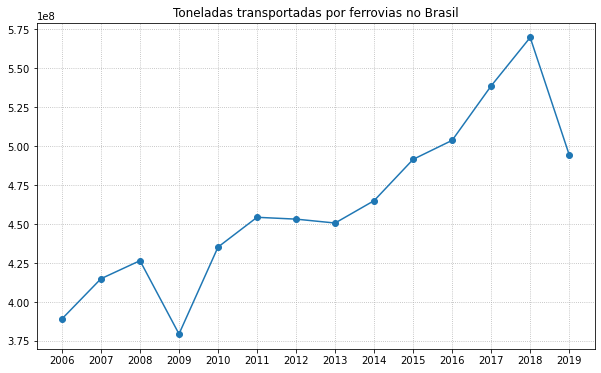

In [148]:
# Gráfico
plt.figure(figsize=(10,6))
plt.plot(ton_ano,'-o', label='teste')
plt.grid(linestyle=':')
plt.ylabel('')
plt.xlabel('')
plt.xticks()
plt.title('Toneladas transportadas por ferrovias no Brasil')
plt.show()

O volume de cargas transportado por ferrovias teve forte crescimento entre 2010 e 2018. No entanto, no último ano, o volume transportado apresentou forte queda retornando a níveis inferiores ao ano de 2016.

## 3.2) Toneladas transportadas por UF de origem

In [ ]:
# Série com o total de toneladas transportadas agrupadas por Estado de origem
uf_total = dados.groupby(['UF_Origem'])['TU'].agg('sum').sort_values(ascending=False)
uf_siglas = uf_total.index

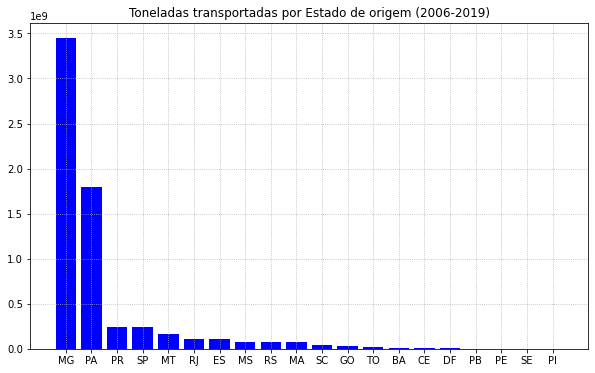

In [19]:
# Gráfico 
plt.figure(figsize=(10,6))
plt.grid(linestyle=':')
plt.bar(uf_siglas,uf_total,color="b")
plt.title('Toneladas transportadas por Estado de origem (2006-2019)')
plt.xlabel('')
plt.ylabel('')
plt.show()

O maior volume das cargas transportadas por ferrovias no período ficou concentrada nos Estados de Minas Gerais e Pará.

Em termos percentuais:

In [13]:
pct_UF = (uf_total / uf_total.sum())*100

pd.Series(pct_UF, name="UF")

UF_Origem
MG    53.308863
PA    27.705461
PR     3.816118
SP     3.699882
MT     2.613552
RJ     1.730683
ES     1.689831
MS     1.180488
RS     1.178693
MA     1.155280
SC     0.698658
GO     0.405883
TO     0.374441
BA     0.194425
CE     0.162467
DF     0.070385
PB     0.009785
PE     0.003662
SE     0.001234
PI     0.000209
Name: TU, dtype: float64

As cargas transportadas com origem em Minas Gerais e Pará correspondem a cerca de 80% 
de todo o volume transportado no período entre 2006 e 2019.

## 3.3) Evolução do número de viagens por ano

In [20]:
# Série com o número de viagens anuais para cada mercadoria
viagens_ano = pd.Series(dados.groupby('Ano')['Mes_Ano'].count(), name='Viagens-ano')

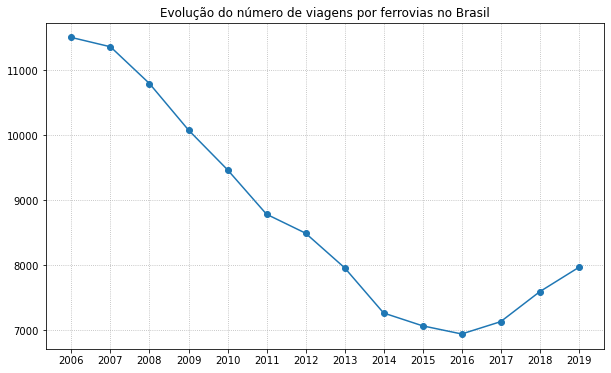

In [150]:
# Gráfico
plt.figure(figsize=(10,6))
plt.plot(viagens_ano,'-o', label='teste')
plt.grid(linestyle=':')
plt.ylabel('')
plt.xlabel('')
plt.xticks()
plt.title('Evolução do número de viagens por ferrovias no Brasil')
plt.show()

O número de viagens realizadas por ferrovias apresentou tendência de queda entre 2006 e 2016. No entanto, nos últimos três anos, é observada uma retomada no uso deste modal para o transporte de cargas.

Em 2019 houve um aumento no número de viagens com um decréscimo no número de toneladas transportadas. Este resultado pode ter ocorrido devido à redução do número de viagens para um determinado tipo de mercadoria que possui alta tonelada por viagem.

## 3.4) Número de viagens por UF de origem

In [ ]:
# Série com o total do número de viagens agrupadas por Estado de Origem  
uf_viagens = dados.groupby('UF_Origem')['Mes_Ano'].agg('count').sort_values(ascending=False)
uf_siglas = uf_viagens.index

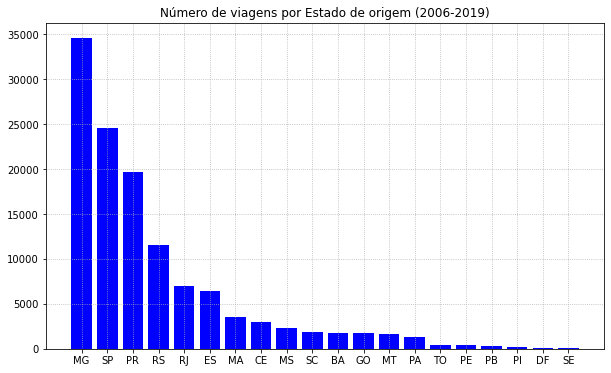

In [36]:
# Gráfico
plt.figure(figsize=(10,6))
plt.grid(linestyle=':')
plt.bar(uf_siglas,uf_viagens,color="b")
plt.title('Número de viagens por Estado de origem (2006-2019)')
plt.xlabel('')
plt.ylabel('')
plt.show()

Em termos percentuais

In [70]:
pct_viagens_UF = (uf_viagens / uf_viagens.sum())*100

pd.Series(pct_viagens_UF, name="UF")

UF_Origem
MG    28.236361
SP    20.114210
PR    16.064572
RS     9.474209
RJ     5.668023
ES     5.230953
MA     2.924693
CE     2.422267
MS     1.874091
SC     1.505645
BA     1.447641
GO     1.443557
MT     1.335719
PA     1.059589
TO     0.352924
PE     0.313710
PB     0.223845
PI     0.161757
DF     0.116824
SE     0.029410
Name: UF, dtype: float64

Observe que quando analisamos pelo número total de viagens outros Estados da federação ganham relevância. Podemos destacar Minas Gerais, São Paulo, Paraná e Rio Grande do Sul como os principais Estados que utilizam as ferrovias para o de transporte de cargas, estas quatro unidades da federação representam mais de 50% do número de viagens no território nacional. 

## 3.5) Volume transportado por mercadoria

In [46]:
# Série com o total de volume transportado agrupado por tipo de mercadoria
mercadoria_ano = dados.groupby(['Mercadoria_ANTT'])['TU'].agg('sum').sort_values(ascending=False)

In [ ]:
# Transforma em DataFrame e calcula o percentual
mercadoria_ano = pd.DataFrame(mercadoria_ano)
mercadoria_ano['Percentual'] = (mercadoria_ano / mercadoria_ano.sum())*100

O gráfico a seguir apresenta as 10 mercadorias com maior volume transportado entre 2006 e 2019.

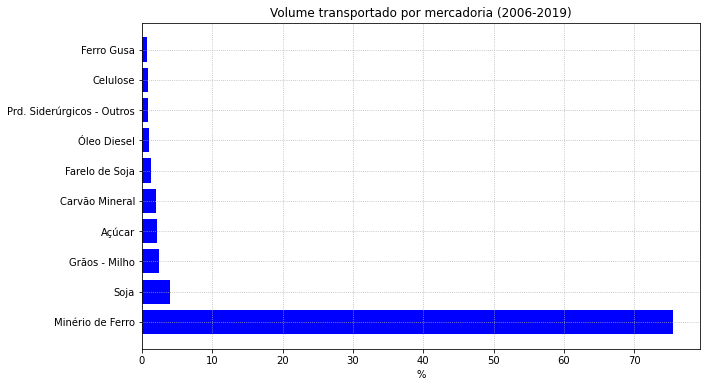

In [49]:
nomes_mercadorias = mercadoria_ano.index[0:10]

# Gráfico
plt.figure(figsize=(10,6))
plt.barh(nomes_mercadorias,mercadoria_ano.Percentual[0:10],color="b")
plt.title('Volume transportado por mercadoria (2006-2019)')
plt.xlabel('%')
plt.grid(linestyle=':')
plt.ylabel('')
plt.show()

Em termos percentuais:

In [71]:
pd.DataFrame(mercadoria_ano.Percentual[0:10],columns=['Percentual'])

,Percentual
Mercadoria_ANTT,
Minério de Ferro,75.557473
Soja,3.973224
Grãos - Milho,2.374145
Açúcar,2.124744
Carvão Mineral,2.040684
Farelo de Soja,1.288272
Óleo Diesel,1.046317
Prd. Siderúrgicos - Outros,0.802155
Celulose,0.793718


Mais de 90% das toneladas transportadas através do modal ferroviário abrangeu 10 mercadorias entre 2006 e 2019. O tripé Minério de Ferro-Soja-Milho foi responsável por aproximadamente 80% do volume transportado no Brasil para o período de análise.

## 3.6) Evolução anual do volume transportado para as principais mercadorias

Além de verificar a evolução do volume de cargas transportado e as mercadorias com maior importância relativa neste tipo de modal, é interessante verificar a evolução do uso das ferrovias entre as principais mercadorias. Para verificar a tendência deste tipo de transporte extraímos as séries temporais para cada mercadoria no período de análise.

In [145]:
# series agrupadas por mercadorias e ano
mercadorias_serie = dados.groupby(['Mercadoria_ANTT','Ano'])['TU'].agg('sum')

nomes_mercadorias = ['Minério de Ferro','Soja','Grãos - Milho', 'Açúcar', 'Carvão Mineral', 'Farelo de Soja', 'Óleo Diesel',
                    'Prd. Siderúrgicos - Outros','Celulose', 'Ferro Gusa']

# Filtro das series agrupadas para as principais mercadorias
series_agrupadas = mercadorias_serie[nomes_mercadorias]


In [146]:
# Dataframe com as toneladas totais anuais para cada uma das principais mercadorias
mercadorias_anual = pd.DataFrame()
for mercadoria in nomes_mercadorias:
    serie = pd.DataFrame(series_agrupadas[mercadoria,])
    mercadorias_anual = pd.concat([serie,mercadorias_anual], axis=1)

mercadorias_anual.columns = nomes_mercadorias

Tabela com a evolução anual do transporte de cargas por tipo de mercadoria entre 2006 e 2019:

In [147]:
mercadorias_anual

,Minério de Ferro,Soja,Grãos - Milho,Açúcar,Carvão Mineral,Farelo de Soja,Óleo Diesel,Prd. Siderúrgicos - Outros,Celulose,Ferro Gusa
Ano,,,,,,,,,,
2006,7023981,1693331,3789059,5505265,7464050,9695634,4998176,1992434,16384712,281691433
2007,6299510,1888908,4788106,5178756,6349320,10706757,4409702,6405180,12886070,307430572
2008,6253357,1815545,4471551,4818987,6453731,11289945,6037055,5143344,14241652,316309608
2009,3182859,2284005,3469679,4513192,6083179,9416722,6504376,6044246,15366299,277950749
2010,3121532,2669730,4324926,4418018,6735030,10516229,9126803,8441460,13908140,324811485
2011,3284586,2722164,4339417,4394006,6586117,9959897,10968021,6555394,16168521,343179801
2012,3115516,2771645,4487062,4695386,5352391,9661248,9627653,12973148,14595842,342701307
2013,3189039,3384390,3086569,4680859,4458614,9063175,10203995,13993089,16119790,341151669
2014,2919965,4693507,2762423,4624025,4976363,10075407,11901046,12501432,15985206,356539501


In [ ]:
# Gráfico


## 3.7) Sazonalidade no transporte das mercadorias

In [120]:
# Filtrando para as principais mercadorias

mercadorias_mes = dados[dados['Mercadoria_ANTT'].isin(nomes_mercadorias)]

In [122]:
# Agregando o total de toneladas para cada mes e mercadoria

mercadorias_mes = mercadorias_mes.groupby(['Mercadoria_ANTT','Mes'])['TU'].agg('sum')

In [123]:
# DataFrame com a soma do total de carga transportada para cada mês entre 2006 e 2019. 

mercadorias_mensal = pd.DataFrame()
    
for mercadoria in nomes_mercadorias:
    serie = pd.DataFrame(mercadorias_mes[mercadoria,])
    mercadorias_mensal = pd.concat([serie,mercadorias_mensal], axis=1)
    
mercadorias_mensal.columns = nomes_mercadorias


Tabela com o total mensal do transporte de cargas por tipo de mercadoria:

In [124]:
mercadorias_mensal

,Minério de Ferro,Soja,Grãos - Milho,Açúcar,Carvão Mineral,Farelo de Soja,Óleo Diesel,Prd. Siderúrgicos - Outros,Celulose,Ferro Gusa
Mes,,,,,,,,,,
01,4358637,4262660,3917855,4931730,4141311,10865017,8396233,8075162,8067358,387789193
02,3845300,3778170,3955662,4973498,5463278,10665877,6265484,2230523,26618181,348289199
03,4036311,4217871,4390835,5884363,7843901,11313655,5564691,902019,41718554,376264117
04,3931671,4169268,4230367,5552463,8618355,10533398,6128023,198673,41373513,372046295
05,3841838,4346334,4488572,5596747,8582976,11233989,11770076,548985,37700355,410411087
06,4078862,4112226,4331893,5668215,8269180,11183987,14102336,5249534,31246106,412615990
07,4343377,4408404,4403772,5914126,7606719,11170271,14114064,17881063,21833623,431732244
08,4438606,4186904,4709418,6018714,7184430,11028338,14918768,24256043,16516351,440694950
09,4775126,4248407,4387464,6030221,6750921,11094460,15506485,26161713,11427792,431255524


No próximo gráfico observamos o total transportado para cada mês entre as 10 principais mercadorias no período analisado. A principal finalidade deste gráfico é verificar a possibilidade da sazonalidade no transporte de cargas para determinada mercadoria.

In [9]:
# Gráfico

In [129]:
meses = list(range(1,13,1))
meses

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

## 3.8) Volume transportado das principais mercadorias para cada UF

## 3.9) Principais estações de origem e destino

In [166]:
# Principais pontos de origem para o ano de 2019.

origem = dados[dados['Ano']=='2019'].groupby(['Estacao_Origem','UF_Origem'])['TU'].agg('sum').sort_values(ascending=False)

teste = pd.DataFrame(origem)

In [169]:
teste.head(10)

,,TU
Estacao_Origem,UF_Origem,
Carajás,PA,117734043
Serra Sul,PA,70728280
Casa de Pedra,MG,22292651
Conceição,MG,22068216
Brucutu,MG,21472065
Rondonópolis,MT,16848826
João Paulo,MG,14062356
Pires,MG,13475336
Olhos D Água,MG,10679070


In [173]:
teste.columns

Index(['TU'], dtype='object')

In [158]:
# Principais pontos de destino para o ano de 2019.

destino = dados[dados['Ano']=='2019'].groupby(['Estacao_Destino','UF_Destino'])['TU'].agg('sum').sort_values(ascending=False)

In [48]:
destino

Estacao_Destino   UF_Destino
Ponta da Madeira  MA            190164613
Tubarão           ES             86086265
Baia Sepetiba     RJ             36850437
Santos            SP             23621230
Guaiba            RJ             20426875
                                  ...    
Cariré            CE                   34
Altamira          PI                   27
Água Branca       PI                   18
Sucesso           CE                    7
Sombra            PI                    6
Name: TU, Length: 196, dtype: int64

In [50]:
# Para todos as estações de origem:

todas_origem = dados.groupby(['Estacao_Origem','UF_Origem'])['TU'].agg('sum').sort_values(ascending=False)

todas_origem

Estacao_Origem  UF_Origem
Carajás         PA           1605286330
Otavio Dapieve  MG            505192456
Brucutu         MG            379974400
Conceição       MG            303656367
Casa de Pedra   MG            253779833
                                ...    
Ibiapaba        CE                   21
Caxias Nova     MA                   13
Ipu             CE                    7
Croatá          CE                    6
Altos           PI                    2
Name: TU, Length: 420, dtype: int64

# 4) Modelo de previsão para o transporte mensal das principais mercadorias

In [43]:
# Análise anual do minerio de ferro

serie_minerio = dados[dados['Mercadoria_ANTT']=='Minério de Ferro'].groupby('Ano')['TU'].agg('sum')

print(serie_minerio)

Ano
2006    281691433
2007    307430572
2008    316309608
2009    277950749
2010    324811485
2011    343179801
2012    342701307
2013    341151669
2014    356539501
2015    378035830
2016    397081916
2017    416283249
2018    441138702
2019    362089570
Name: TU, dtype: int64


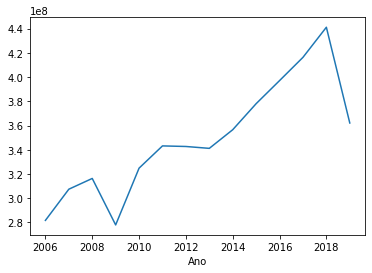

In [44]:
serie_minerio.plot()

In [50]:
# Análise anual da soja
serie_soja = dados[dados['Mercadoria_ANTT']=='Soja'].groupby('Ano')['TU'].agg('sum')

print(serie_soja)

Ano
2006    16384712
2007    12886070
2008    14241652
2009    15366299
2010    13908140
2011    16168521
2012    14595842
2013    16119790
2014    15985206
2015    17690744
2016    17666351
2017    24316315
2018    32840604
2019    28783104
Name: TU, dtype: int64


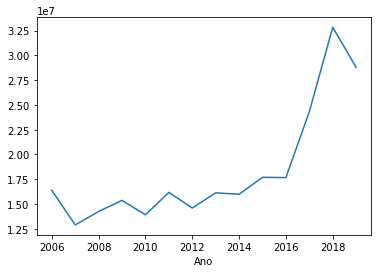

In [51]:
serie_soja.plot()

In [52]:
# Análise anual do milho
serie_milho = dados[dados['Mercadoria_ANTT']=='Grãos - Milho'].groupby('Ano')['TU'].agg('sum')

print(serie_milho)

Ano
2006     1992434
2007     6405180
2008     5143344
2009     6044246
2010     8441460
2011     6555394
2012    12973148
2013    13993089
2014    12501432
2015    15670981
2016    10228162
2017    17896320
2018    14454097
2019    21239580
Name: TU, dtype: int64


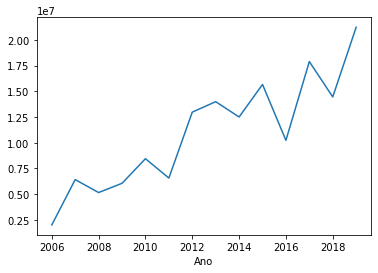

In [53]:
serie_milho.plot()

# Referências